In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\parna\Downloads\bank+marketing (2)\bank\bank-full.csv", sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

# Convert target variable to numeric
df['y'] = df['y'].map({'yes':1, 'no':0})

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
conversion_rate = df['y'].mean() * 100
print("Overall Campaign Conversion Rate: ", round(conversion_rate,2), "%")

Overall Campaign Conversion Rate:  11.7 %


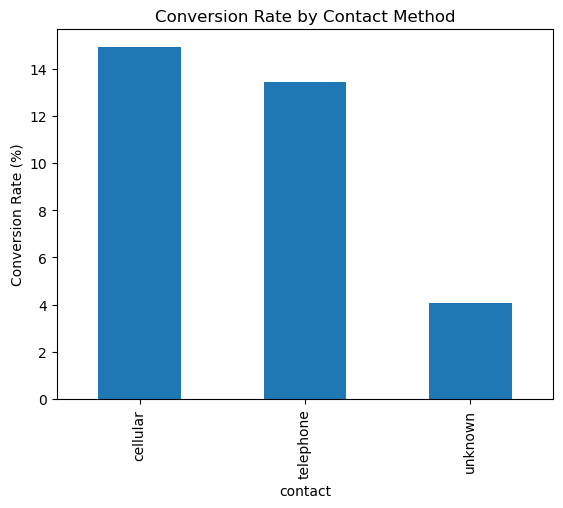

contact
cellular     14.918900
telephone    13.420509
unknown       4.070661
Name: y, dtype: float64

In [5]:
contact_conversion = df.groupby('contact')['y'].mean() * 100

contact_conversion.sort_values(ascending=False).plot(kind='bar')
plt.title("Conversion Rate by Contact Method")
plt.ylabel("Conversion Rate (%)")
plt.show()

contact_conversion

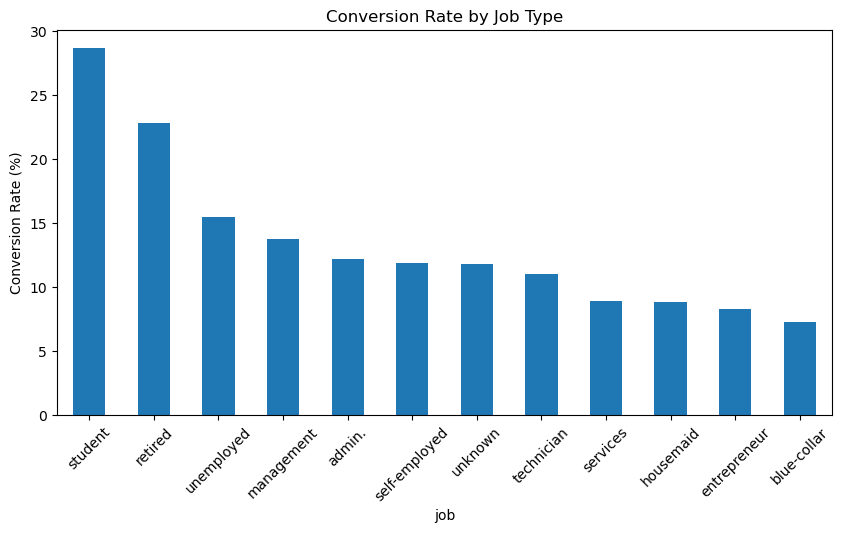

In [6]:
job_conversion = df.groupby('job')['y'].mean() * 100

job_conversion.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Conversion Rate by Job Type")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()

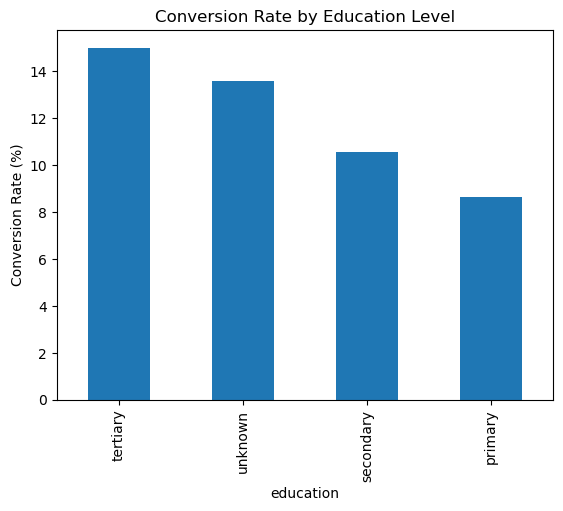

In [7]:
education_conversion = df.groupby('education')['y'].mean() * 100

education_conversion.sort_values(ascending=False).plot(kind='bar')
plt.title("Conversion Rate by Education Level")
plt.ylabel("Conversion Rate (%)")
plt.show()

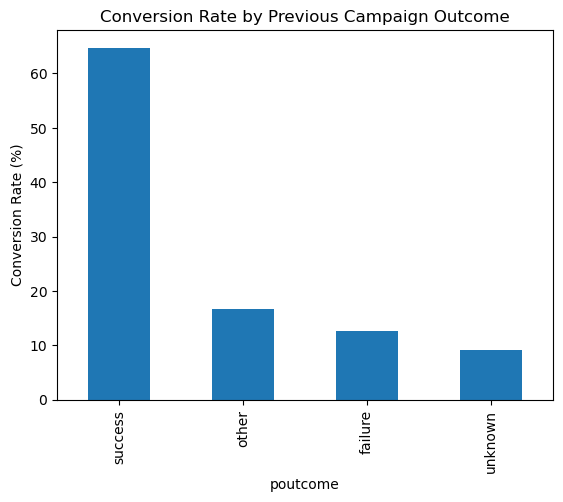

poutcome
failure    12.609671
other      16.684783
success    64.725347
unknown     9.161503
Name: y, dtype: float64

In [8]:
previous_conversion = df.groupby('poutcome')['y'].mean() * 100

previous_conversion.sort_values(ascending=False).plot(kind='bar')
plt.title("Conversion Rate by Previous Campaign Outcome")
plt.ylabel("Conversion Rate (%)")
plt.show()

previous_conversion

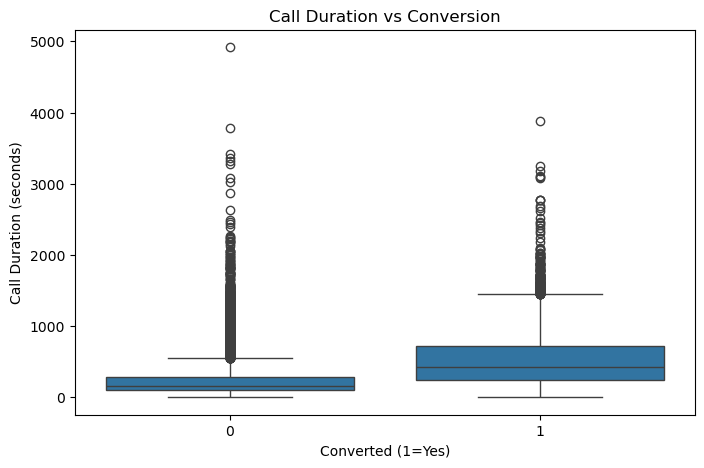

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='y', y='duration')
plt.title("Call Duration vs Conversion")
plt.xlabel("Converted (1=Yes)")
plt.ylabel("Call Duration (seconds)")
plt.show()

C:\Users\parna\AppData\Local\Temp\ipykernel_32120\4054872249.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conversion = df.groupby('age_group')['y'].mean() * 100


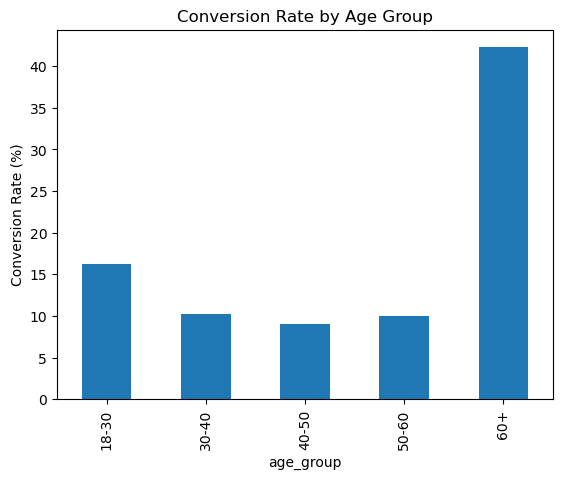

In [10]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,40,50,60,100],
                         labels=['18-30','30-40','40-50','50-60','60+'])

age_conversion = df.groupby('age_group')['y'].mean() * 100

age_conversion.plot(kind='bar')
plt.title("Conversion Rate by Age Group")
plt.ylabel("Conversion Rate (%)")
plt.show()

In [11]:
converted = df['y'].sum()
total_contacts = len(df)
drop_off = total_contacts - converted

print("Total Contacts:", total_contacts)
print("Total Conversions:", converted)
print("Total Drop-offs:", drop_off)

Total Contacts: 45211
Total Conversions: 5289
Total Drop-offs: 39922
